<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;">
Đề bài: Xây dựng Hồi quy Logistic từ cơ bản bằng SciPy
Mục tiêu: Hãy sử dụng các thư viện numpy, scipy.optimize và matplotlib để tự xây dựng một mô hình Hồi quy Logistic, thay vì sử dụng thư viện scikit-learn có sẵn.
Yêu cầu:
1 Khởi tạo dữ liệu:
   Cho tập dữ liệu đầu vào X = [[1, 2], [2, 3], [3, 1], [2, 5], [4, 3]] và nhãn tương ứng Y = [1, 1, 1, 0, 0].
   Hãy thêm một cột giá trị 1 (bias) vào tập dữ liệu X để phục vụ cho tính toán.
2 Định nghĩa hàm:
   Viết hàm sigmoid(z) để tính toán hàm Sigmoid.
   Viết hàm loss(w) để tính hàm mất mát log-likelihood (hay cross-entropy).
   Viết hàm gradient(theta) để tính gradient của hàm mất mát.
3 Tối ưu hóa mô hình:
   Sử dụng hàm minimize của scipy.optimize với phương pháp 'BFGS' để tìm ra vector trọng số tối ưu (w) bằng cách tối thiểu hóa hàm mất mát loss.
   Lưu ý rằng bạn sẽ cần truyền hàm gradient vào tham số jac của minimize.
4 Dự đoán và trực quan hóa:
   Dự đoán nhãn cho một điểm dữ liệu mới (1, 4).
   Dùng các trọng số đã tìm được để tính toán và vẽ đường phân tách của mô hình.
   Vẽ biểu đồ hiển thị các điểm dữ liệu ban đầu, điểm dữ liệu mới và đường phân tách.

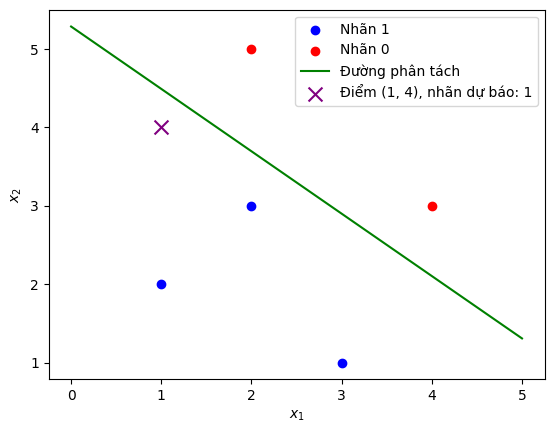

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

X = np.array([[1, 2],
              [2, 3],
              [3, 1],
              [2, 5],
              [4, 3]])
Y = np.array([1, 1, 1, 0, 0])

# Thêm cột bias (ma trận toàn 1) vào X
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm mất mát (log-likelihood hay cross-entropy loss)
def loss(w):
    L = 0
    for x, y in zip(X, Y):
        if y == 0:
            L += -np.log(1 - sigmoid(np.dot(w, x)))
        else:
            L += -np.log(sigmoid(np.dot(w, x)))
    return L / len(X)

# Hàm tính gradient của hàm mất mát
def gradient(theta):
    G = 0
    for x, y in zip(X, Y):
        G += (sigmoid(np.dot(theta, x)) - y) * x
    return G / len(X)

# Khởi tạo các tham số
# vector tham số ban đầu với kích thước (n+1)
initial_theta = np.zeros(X.shape[1])
# Sử dụng scipy.optimize.minimize để tối ưu hóa hàm mất mát
result = minimize(loss, initial_theta,
                  method='BFGS', jac=gradient)
w = result.x

# Dự đoán nhãn cho điểm mới (1, 4)
x_pred = np.array([1, 1, 4])  # thêm 1 cho bias
prob_pred = sigmoid(np.dot(w, x_pred))
y_pred = 1 if prob_pred >= 0.5 else 0

a = -w[1] / w[2]
b = -w[0] / w[2]

# Trực quan hóa các điểm và đường phân tách
plt.figure()

# (1) Vẽ các điểm gán nhãn 1
plt.scatter(
    X[Y == 1][:, 1], X[Y == 1][:, 2],
    color='blue', label='Nhãn 1'
)

# (2) Vẽ các điểm gán nhãn 0
plt.scatter(
    X[Y == 0][:, 1], X[Y == 0][:, 2],
    color='red', label='Nhãn 0'
)

# (3) Xây dựng đường phân tách
X1 = np.linspace(0, 5, 100)
X2 = a * X1 + b
plt.plot(X1, X2, label='Đường phân tách', color='green')

# (4) Vẽ điểm mới (1, 4) với nhãn dự báo
plt.scatter(x_pred[1], x_pred[2], color='purple',
            marker='x', s=100, label=f'Điểm (1, 4), nhãn dự báo: {y_pred}')

# Đặt tên trục và tiêu đề
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

# Hiển thị biểu đồ
plt.show()